In [1]:
import os
from convection_diffusion import ConvectionDiffusionDataset
from FNO_2d import DomainPartitioning2d
from MatDataset import BurgersDatasetWhole
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

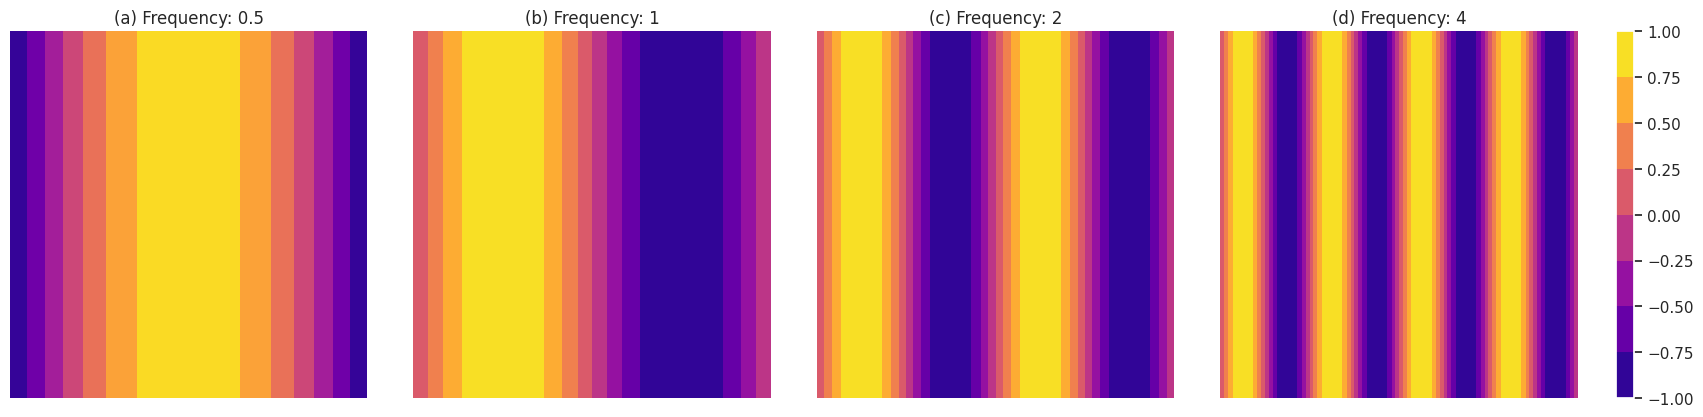

In [2]:
# plot four samples of varying frequency solution
frequency1 = 0.5
frequency2 = 1
frequency3 = 2
frequency4 = 4
domain_size = 1
resolution = 64
num_time_steps = 10
dt = 0.01
num_samples = 20
seed = 0

dataset1 = ConvectionDiffusionDataset(frequency1, domain_size, resolution, num_time_steps, dt, num_samples, seed)
dataset2 = ConvectionDiffusionDataset(frequency2, domain_size, resolution, num_time_steps, dt, num_samples, seed)
dataset3 = ConvectionDiffusionDataset(frequency3, domain_size, resolution, num_time_steps, dt, num_samples, seed)
dataset4 = ConvectionDiffusionDataset(frequency4, domain_size, resolution, num_time_steps, dt, num_samples, seed)

xx = np.linspace(0, 1, 64)
yy = np.linspace(0, 1, 64)
sns.set()
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# increase font size
plt.rcParams.update({'font.size': 80})
labels = ['a', 'b', 'c', 'd']

for i, dataset in enumerate([dataset1, dataset2, dataset3, dataset4]):
    axs[i].contourf(xx, yy, dataset[0][0].squeeze(), cmap='plasma')
    axs[i].set_title(f'({labels[i]}) Frequency: {dataset.frequency}')
    axs[i].axis('off')

# tight_layout() adjusts the subplots to fit into the figure area.
plt.tight_layout(pad=0.5)

# add colorbar on the right
cbar = fig.colorbar(axs[3].contourf(xx, yy, dataset[0][0].squeeze(), cmap='plasma'), ax=axs, orientation='vertical', pad=0.02)

plt.show()


(81, 81)
(81, 81)
(81, 81)
(81, 81)


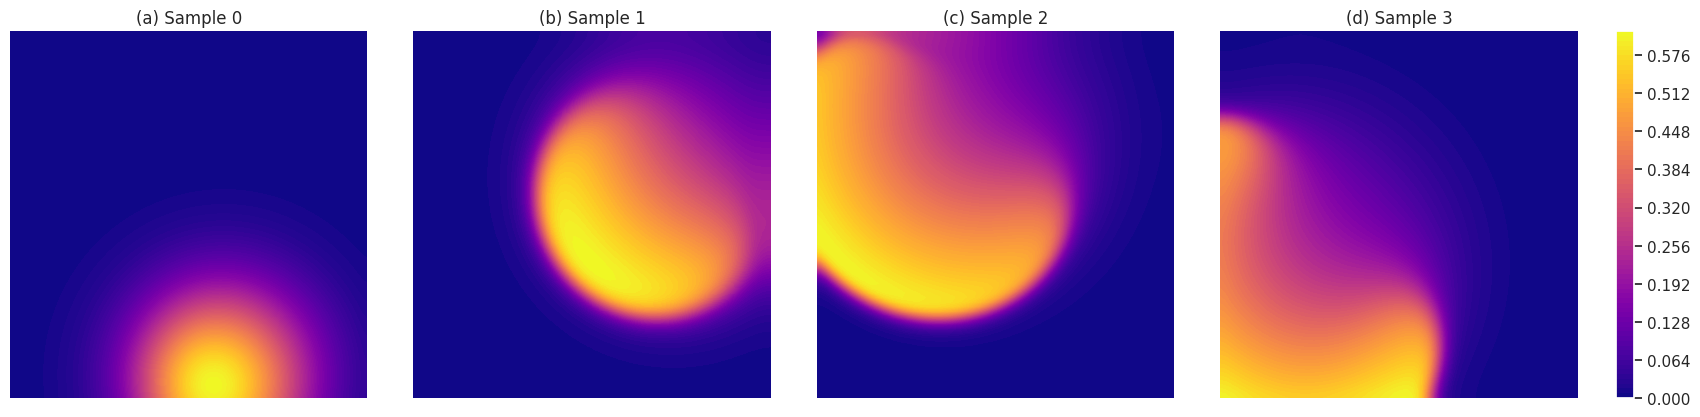

In [3]:
# plot four samples of Burgers' equation
domain_size = 1
resolution = 81

data_dir = os.path.join('data','burgers') 

dataset = BurgersDatasetWhole(root=data_dir)

sns.set()
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# increase font size
plt.rcParams.update({'font.size': 80})
xx = np.linspace(0, 1, 81)
yy = np.linspace(0, 1, 81)
for i in range(4):
    sample = dataset[i * 1000]
    print(sample[0][:, :, 0].shape)
    axs[i].contourf(xx, yy, sample[0][:, :, 0], cmap='plasma', levels=100)
    axs[i].set_title(f'({labels[i]}) Sample {i}')
    axs[i].axis('off')

# tight_layout() adjusts the subplots to fit into the figure area.
plt.tight_layout(pad=0.5)

# add colorbar on the right
cbar = fig.colorbar(axs[3].contourf(xx, yy, sample[0][:, :, 0], cmap='plasma', levels=100), ax=axs, orientation='vertical', pad=0.02)

In [4]:
modes = 8
width = 20
window_size = 6

model = DomainPartitioning2d(modes, modes, width, window_size)
# model.load_state_dict(torch.load('model.pt'))

torch.Size([64, 64, 1])
torch.Size([70, 70])


(0.0, 69.0, 0.0, 69.0)

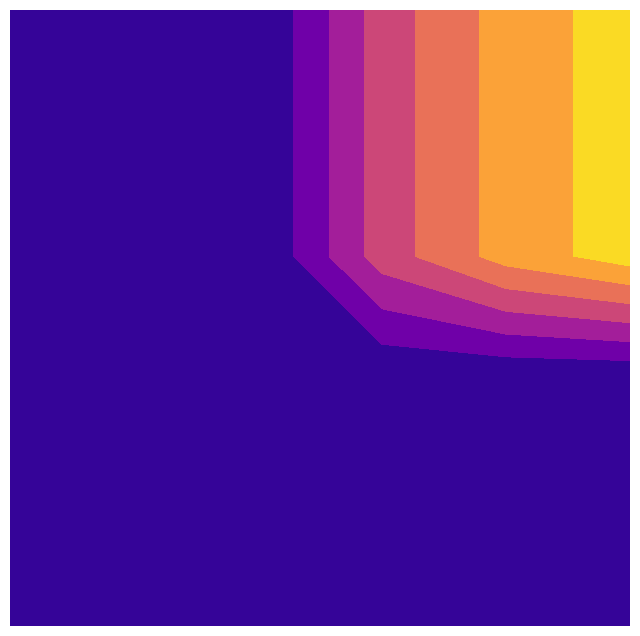

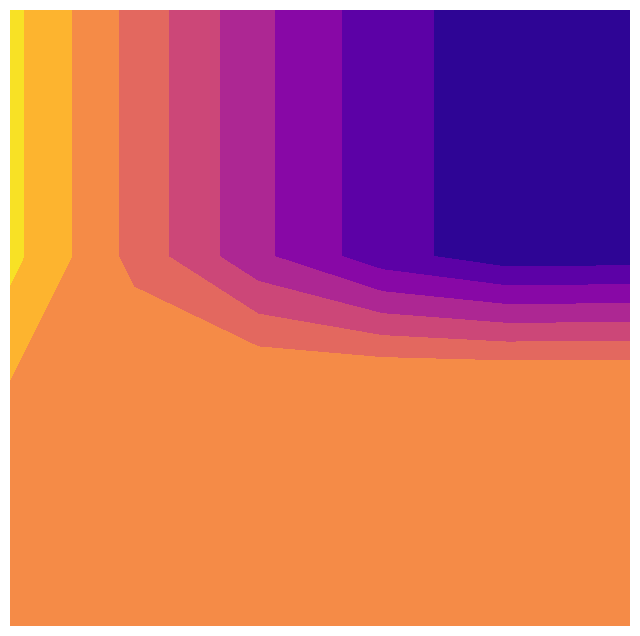

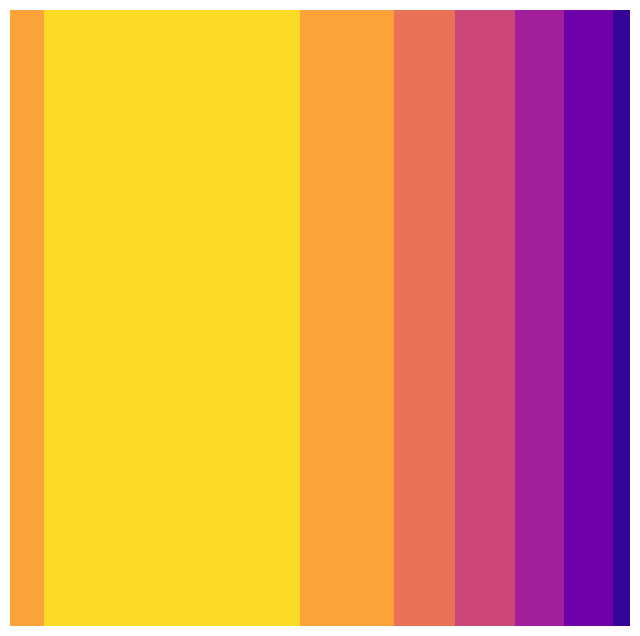

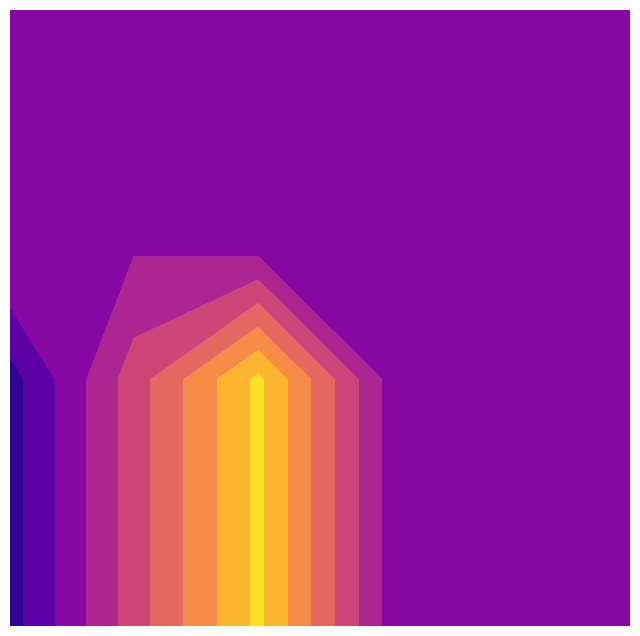

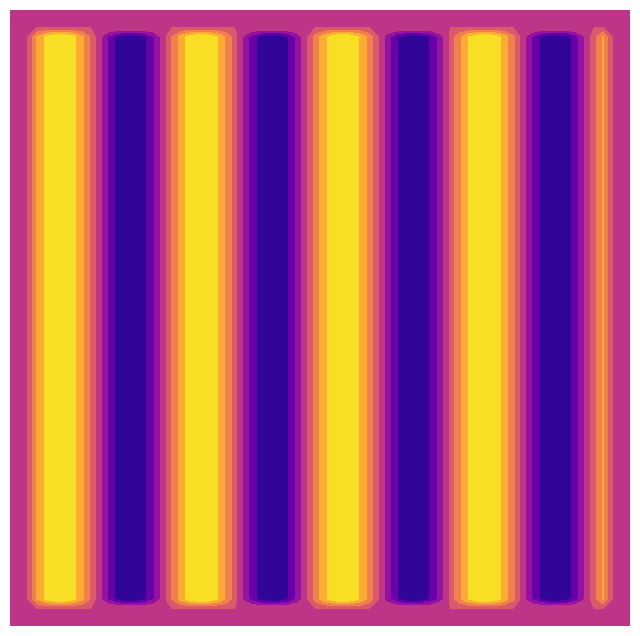

In [5]:
x_loader = torch.utils.data.DataLoader(dataset4, batch_size=4, shuffle=False)
for x, y in x_loader:
    # print(x.shape)
    sub_x_list = model.get_partition_domain(x, mode='train')
    sub_y_list = model.get_partition_domain(y, mode='test')

# plot four different samples at different locations
sns.set()
fig1 = plt.figure(figsize=(8, 8))
x_domain_1 = sub_x_list[0][0][:, :, 0]
# print(x_domain_1.shape)
plt.contourf(x_domain_1, cmap='plasma')
plt.axis('off')

fig2 = plt.figure(figsize=(8, 8))
x_domain_2 = sub_x_list[9][0][:, :, 0]
# print(x_domain_2.shape)
plt.contourf(x_domain_2, cmap='plasma')
plt.axis('off')

fig3 = plt.figure(figsize=(8, 8))
x_domain_3 = sub_x_list[280][0][:, :, 0]
# print(x_domain_3.shape)
plt.contourf(x_domain_3, cmap='plasma')
plt.axis('off')

fig4 = plt.figure(figsize=(8, 8))
x_domain_4 = sub_x_list[-1][0][:, :, 0]
# print(x_domain_4.shape)
plt.contourf(x_domain_4, cmap='plasma')
plt.axis('off')

fig_whole = plt.figure(figsize=(8, 8))
print(x[0].shape)
x, pad_size = model.symmetric_padding(x, mode='test')
x_whole = x[0].squeeze()
print(x_whole.shape)
plt.contourf(x_whole, cmap='plasma')
plt.axis('off')

(0.0, 5.0, 0.0, 5.0)

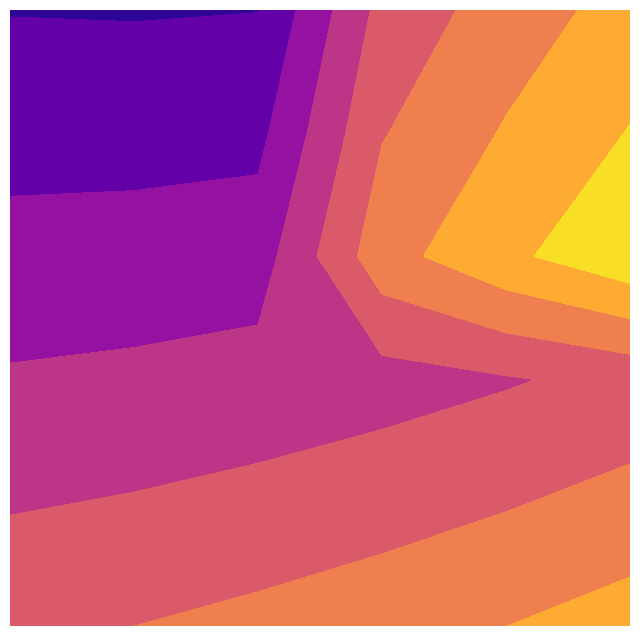

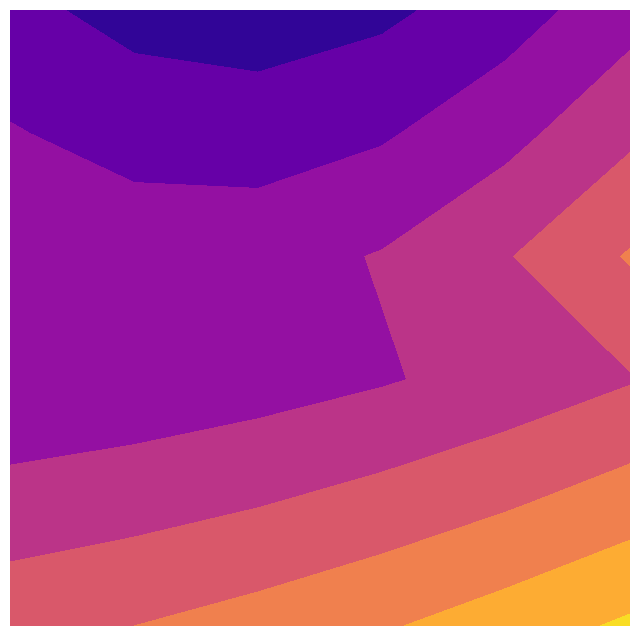

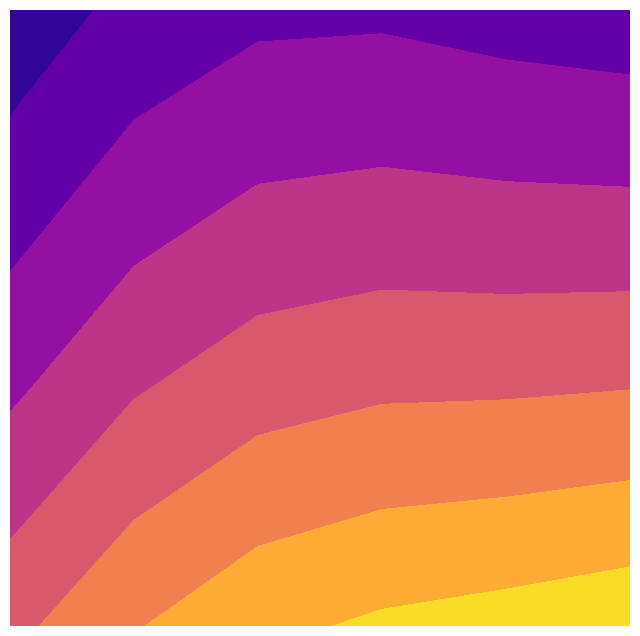

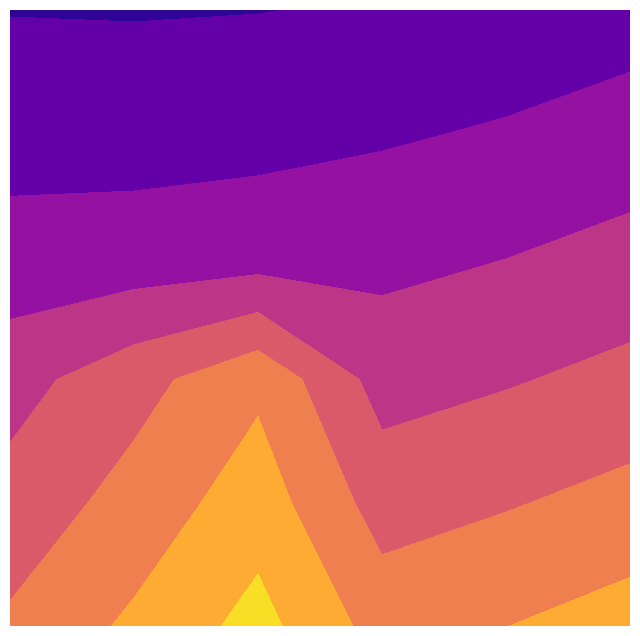

In [6]:
pred_x_1 = model(sub_x_list[0]).detach().numpy()
pred_x_2 = model(sub_x_list[9]).detach().numpy()
pred_x_3 = model(sub_x_list[280]).detach().numpy()
pred_x_4 = model(sub_x_list[-1]).detach().numpy()

fig_pred_1 = plt.figure(figsize=(8, 8))
plt.contourf(pred_x_1[0].squeeze(), cmap='plasma')
plt.axis('off')

fig_pred_2 = plt.figure(figsize=(8, 8))
plt.contourf(pred_x_2[0].squeeze(), cmap='plasma')
plt.axis('off')

fig_pred_3 = plt.figure(figsize=(8, 8))
plt.contourf(pred_x_3[0].squeeze(), cmap='plasma')
plt.axis('off')

fig_pred_4 = plt.figure(figsize=(8, 8))
plt.contourf(pred_x_4[0].squeeze(), cmap='plasma')
plt.axis('off')


(0.0, 63.0, 0.0, 63.0)

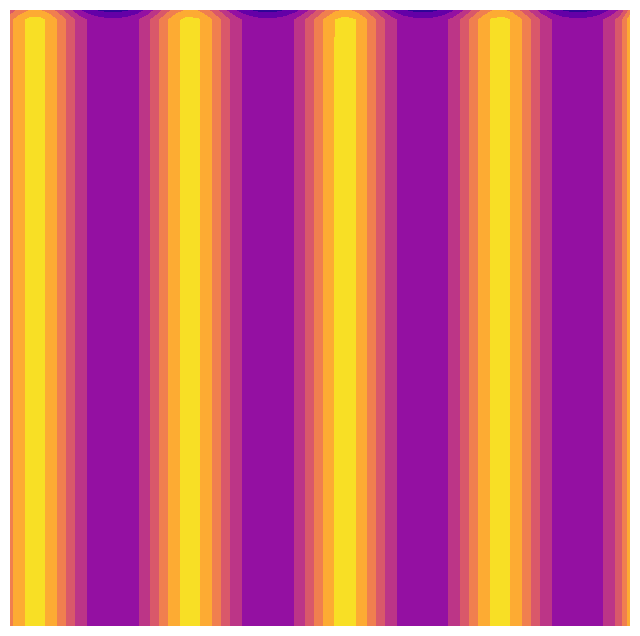

: 

In [7]:
pred_list = []
for sub_x in sub_x_list:
    pred = model(sub_x)
    pred_list.append(pred)

pred_whole = model.reconstruct_from_partitions(y, pred_list).detach().numpy()
fig_pred_whole = plt.figure(figsize=(8, 8))
plt.contourf(pred_whole[0].squeeze(), cmap='plasma')
plt.axis('off')